# Logistic Regression on CVD

In [1]:
#import dependencies
import pandas as pd

In [2]:
#read in data set
df = pd.read_csv("Resources/cvd_period1_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,DEATH,CVD
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,1
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1,1,1
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,0.0,77.0,99.0,0,1,0,1
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,0.0,60.0,85.0,0,0,0,0
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,0.0,79.0,78.0,0,0,0,0
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,0.0,76.0,79.0,0,1,0,0
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,0.0,93.0,88.0,0,1,0,0


In [3]:
cvd_df = df.set_index('RANDID')
cvd_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,DEATH,CVD
RANDID,,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,1
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1,1,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0,0


In [4]:
# Number of hospitalizations for myocardial infarctions and number of non-events
cvd_count=cvd_df.loc[(cvd_df['CVD']==1)]
no_cvd_count = cvd_df.loc[(cvd_df['CVD']==0)]

print(f"Subjects hospitalized with cvd: {len(cvd_count)}")
print(f"Subjects with no cvd events: {len(no_cvd_count)}")

Subjects hospitalized with cvd: 897
Subjects with no cvd events: 2833


In [5]:
cvd_df.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVAP', 'PREVHYP',
       'DEATH', 'CVD'],
      dtype='object')

In [6]:
#Remove columns not involved in analysis
#removed 'Time', 'Period', 'Death', 'MI_FCHD', 'TIMEMI', 'TIMEMIFC'
cvd_reg_df = cvd_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
                     'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVAP', 'PREVHYP', 'CVD']]
cvd_reg_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,CVD
RANDID,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,1
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0


In [7]:
# Assign X (data) and y (target)
X = cvd_reg_df.drop('CVD', axis=1)
y= cvd_reg_df['CVD']
print(X.shape, y.shape)

(3730, 14) (3730,)


In [40]:
target_names = target_names = ["negative", "positive"]
feature_names = X.columns

In [41]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [43]:
# Fit the model to the data
classifier.fit(X_train, y_train)

C:\Users\jtaum\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [44]:
#Validate the model using test data
# Print the r2 score for the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8439763001974984
Testing Data Score: 0.8126232741617357


In [13]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = classifier.predict(X_test)
cvd_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
cvd_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
928,0,1
929,0,1
930,0,1
931,0,0


In [14]:
p0a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==0)]
p1a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==1)]
p0a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==1)]
p1a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==0)]

In [15]:
print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  697
Event prediction = 1 and actual = 1:  35
Event prediction = 0 and actual = 1:  172
Event prediction = 1 and actual = 0:  29


In [16]:
TP = len(p1a1)
TN = len(p0a0)
FP = len(p1a0)
FN = len(p0a1)

Accuracy = (TP + TN)/len(cvd_predictions)
Precision = TP/(TP + FP)
Recall = TP/(TP + FN)
F1 = 2*((Precision*Recall)/ (Precision+Recall))

print("Accuracy: %.3f" % Accuracy)
print("Precision: %.3f" % Precision)
print("Recall: %.3f" % Recall)
print("F1 Measure: %.3f" % F1)

Accuracy: 0.785
Precision: 0.547
Recall: 0.169
F1 Measure: 0.258


In [17]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.80      0.96      0.87       726
    positive       0.55      0.17      0.26       207

    accuracy                           0.78       933
   macro avg       0.67      0.56      0.57       933
weighted avg       0.75      0.78      0.74       933



## CVD period 1 logistic regression with scaled data

In [18]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [19]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
#run logistic regression on scaled data
classifier_scaled = LogisticRegression()

# Fit the model to the data
classifier_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
#Validate the model using scaledtest data
# Print the r2 score for the test data
print(f"Training Data Score: {classifier_scaled.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier_scaled.score(X_test_scaled, y_test)}")

Training Data Score: 0.7626027887021809
Testing Data Score: 0.782422293676313


In [22]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions_scaled = classifier_scaled.predict(X_test_scaled)
cvd_predictions_scaled = pd.DataFrame({"Prediction": predictions_scaled, "Actual": y_test}).reset_index(drop=True)

p0a0 = cvd_predictions_scaled.loc[(cvd_predictions_scaled['Prediction']==0) & (cvd_predictions_scaled['Actual']==0)]
p1a1 = cvd_predictions_scaled.loc[(cvd_predictions_scaled['Prediction']==1) & (cvd_predictions_scaled['Actual']==1)]
p0a1 = cvd_predictions_scaled.loc[(cvd_predictions_scaled['Prediction']==0) & (cvd_predictions_scaled['Actual']==1)]
p1a0 = cvd_predictions_scaled.loc[(cvd_predictions_scaled['Prediction']==1) & (cvd_predictions_scaled['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  692
Event prediction = 1 and actual = 1:  38
Event prediction = 0 and actual = 1:  169
Event prediction = 1 and actual = 0:  34


In [23]:
prob = classifier_scaled.predict_proba(X_test_scaled)
prob[0]

array([0.96364111, 0.03635889])

In [24]:
cvd_probabilities = prob.tolist()

cvd_prob_df = pd.DataFrame(prob, y_test)
cvd_prob_df

,0,1
CVD,,
0,0.963641,0.036359
0,0.952252,0.047748
0,0.754930,0.245070
0,0.631828,0.368172
0,0.969297,0.030703
...,...,...
1,0.476326,0.523674
1,0.663845,0.336155
1,0.623442,0.376558


<AxesSubplot:xlabel='0', ylabel='1'>

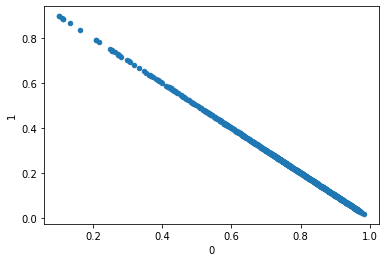

In [25]:
cvd_prob_df.plot.scatter(0,1)

## CVD period 3 logistic regression

In [26]:
period3_df = pd.read_csv("Resources/cvd_period3_data.csv")
period3_df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,HDLC,LDLC,DEATH,CVD
0,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,54.0,141.0,0,0
1,11263,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,0,1,46.0,135.0,0,1
2,12806,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,0,0,34.0,286.0,0,0
3,14367,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,92.0,82.0,0,1,44.0,236.0,0,0
4,16365,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,75.0,85.0,0,1,48.0,163.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,9978986,2,243.0,68,110.0,66.0,0,0.0,24.30,0,0.0,80.0,108.0,0,1,65.0,178.0,0,0
2022,9982118,1,219.0,70,163.5,75.0,0,0.0,25.26,0,0.0,65.0,103.0,0,1,50.0,169.0,1,1
2023,9990894,2,228.0,60,205.0,100.0,1,20.0,22.37,0,0.0,80.0,91.0,0,1,47.0,181.0,1,0
2024,9993179,2,251.0,56,145.0,92.0,1,35.0,21.97,0,1.0,95.0,90.0,0,1,70.0,181.0,1,0


In [27]:
cvd3_df = period3_df.set_index('RANDID')
cvd3_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,HDLC,LDLC,DEATH,CVD
RANDID,,,,,,,,,,,,,,,,,,
6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,54.0,141.0,0,0
11263,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,0,1,46.0,135.0,0,1
12806,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,0,0,34.0,286.0,0,0
14367,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,92.0,82.0,0,1,44.0,236.0,0,0
16365,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,75.0,85.0,0,1,48.0,163.0,0,0


In [28]:
# Number of hospitalizations for cvd and number of non-events
cvd_count=cvd3_df.loc[(cvd3_df['CVD']==1)]
no_cvd_count = cvd3_df.loc[(cvd3_df['CVD']==0)]

print(f"Subjects hospitalized with cvd: {len(cvd_count)}")
print(f"Subjects with no cvd events: {len(no_cvd_count)}")

Subjects hospitalized with cvd: 332
Subjects with no cvd events: 1694


In [29]:
cvd3_df.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVAP', 'PREVHYP',
       'HDLC', 'LDLC', 'DEATH', 'CVD'],
      dtype='object')

In [30]:
#Remove columns not involved in analysis
#removed 'Time', 'Period', 'Death', 'MI_FCHD', 'TIMEMI', 'TIMEMIFC'
cvd3_reg_df = cvd3_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVAP', 'PREVHYP',
       'HDLC', 'LDLC', 'CVD']]
cvd3_reg_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVAP,PREVHYP,HDLC,LDLC,CVD
RANDID,,,,,,,,,,,,,,,,,
6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,54.0,141.0,0
11263,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,86.0,81.0,0,1,46.0,135.0,1
12806,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,75.0,87.0,0,0,34.0,286.0,0
14367,1,280.0,64,168.0,100.0,0,0.0,25.72,0,0.0,92.0,82.0,0,1,44.0,236.0,0
16365,1,211.0,55,173.0,123.0,0,0.0,29.11,0,1.0,75.0,85.0,0,1,48.0,163.0,0


In [31]:
# Assign X (data) and y (target)
X = cvd3_reg_df.drop('CVD', axis=1)
y= cvd3_reg_df['CVD']
print(X.shape, y.shape)

(2026, 16) (2026,)


In [32]:
# Split the data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44)

In [33]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [34]:
# Fit the model to the data
classifier.fit(X_train, y_train)

C:\Users\jtaum\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
#Validate the model using test data
# Print the r2 score for the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8393680052666228
Testing Data Score: 0.8303747534516766


In [36]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = classifier.predict(X_test)
cvd_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
cvd_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
502,0,0
503,0,0
504,0,0
505,0,0


In [37]:
p0a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==0)]
p1a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==1)]
p0a1 = cvd_predictions.loc[(cvd_predictions['Prediction']==0) & (cvd_predictions['Actual']==1)]
p1a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  415
Event prediction = 1 and actual = 1:  6
Event prediction = 0 and actual = 1:  83
Event prediction = 1 and actual = 0:  3


In [38]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.83      0.99      0.91       418
    positive       0.67      0.07      0.12        89

    accuracy                           0.83       507
   macro avg       0.75      0.53      0.51       507
weighted avg       0.80      0.83      0.77       507

